# Databases
Guest lecture by Bradley Dice, [@bdice](https://github.com/bdice/).

### Why databases?
Tons of applications: managing digital content (websites), product inventories, transactions, health records... structure, security, and speed are all important.

- What if the size of your data exceeds the memory of the system?
  - Out-of-core algorithms.
- What if your data needs to be accessed by servers around the world?
  - Split it up by geography.
- Text files and spreadsheets can only do so much.

Databases administrators have to think about software, hardware, data structures, permissions and roles, backups, reports, optimization, and migration. This lecture will focus on the "user" side, especially how to get information out of a SQL database for analysis.

## What can we expect from most databases? CRUD + ACID.

Operations you can perform: **CRUD.** When interfacing with a database, you can expect to have these functions available.
- **Create:** Add new data.
- **Read:** Fetch existing data.
- **Update:** Edit existing data.
- **Delete:** Remove data.

Guarantees for how the database will act: **ACID.** These properties ensure databases are protected against hardware failures and software errors.
- **Atomicity:** Transactions will be completed fully, or not at all.
- **Consistency:** Transactions must leave the database in a valid state.
- **Isolation:** Transactions performed concurrently must act the same as transactions performed sequentially.
- **Durability:** Transactions must be permanent (i.e. stored on a disk, not in memory).

### Types of databases
- Relational and non-relational.
- These generally correspond to "SQL-like" and "NoSQL-like."

## Relational Databases
Programmers interface with relational databases through Structured Query Language (SQL).
### Examples:
Open Source:
- MySQL
- PostgreSQL (aka Postgres)
- SQLite (for local, application-level storage)

Commercial:
- Oracle Database (aka Oracle)
- Microsoft SQL Server
- DB2 (IBM)
- Microsoft Access, though casual users might not even realize it

## Non-relational Databases
Sometimes the structure of relational databases can be limiting. What if some properties are defined for one object but not another? There are a few types of non-relational databases including *column stores* (e.g. Cassandra), *document stores* (e.g. MongoDB), *key-value stores* (e.g. Redis), and *graph databases* (e.g. Neo4j).

### Examples:
Open Source:
- MongoDB
- Apache Cassandra
- Redis
- Apache CouchDB
- Neo4j

## Python Example with sqlite3
Reminder: triple-double-quotes `"""like this"""` are just another form of Python string, and you can include single or double quotes inside. This is useful for complicated SQL statements.

In [1]:
import sqlite3
import os

database = 'test.sqlite'

# Removes the database if it already exists
if os.path.exists(database):
    os.remove(database)

**Create** data with the `CREATE TABLE` and `INSERT` statements. There are many data types, including `TEXT`, `INTEGER`, `REAL`, `BLOB`, and more. See this [reference list of common SQL data types](https://www.w3schools.com/sql/sql_datatypes.asp).

In [2]:
with sqlite3.connect(database) as conn:
    cursor = conn.cursor()
    cursor.execute(
        """CREATE TABLE People
        (first_name TEXT, last_name TEXT, job TEXT, age REAL)""")
    cursor.execute(
        """INSERT INTO People VALUES (?,?,?,?)""",
        ('Bradley', 'Dice', 'Guest Lecturer', 25))

**Note:** We *always* use the "prepared statement" syntax `(?,?,?,?)` instead of formatting the string directly to avoid [SQL Injection](https://en.wikipedia.org/wiki/SQL_injection)!

We can also just use `conn` directly, with a shorter syntax that creates cursors automatically. Also, we use `executemany` with a list of tuples, to perform many actions at once.

In [3]:
# Let's add lots of people
famous_actors = [
    ('Robert', 'Downey Jr.', 'Iron Man', 53),
    ('Chris', 'Evans', 'Captain America', 37),
    ('Scarlett', 'Johansson', 'Black Widow', 33),
    ('Samuel', 'Jackson', 'Nick Fury', 69),
    ('Benedict', 'Cumberbatch', 'Dr. Strange', 42),
    ('Brie', 'Larson', 'Captain Marvel', 29),
    ('Chadwick', 'Boseman', 'Black Panther', 40),
]
# Yes, I'm a Marvel fan
with sqlite3.connect(database) as conn:
    conn.executemany("""INSERT INTO People VALUES (?,?,?,?)""", famous_actors)

**Read** data with the `SELECT` statement.

In [4]:
with sqlite3.connect(database) as conn:
    cursor = conn.cursor()
    cursor.execute(
        """SELECT * FROM People""")
    print(cursor.fetchall())

[('Bradley', 'Dice', 'Guest Lecturer', 25.0), ('Robert', 'Downey Jr.', 'Iron Man', 53.0), ('Chris', 'Evans', 'Captain America', 37.0), ('Scarlett', 'Johansson', 'Black Widow', 33.0), ('Samuel', 'Jackson', 'Nick Fury', 69.0), ('Benedict', 'Cumberbatch', 'Dr. Strange', 42.0), ('Brie', 'Larson', 'Captain Marvel', 29.0), ('Chadwick', 'Boseman', 'Black Panther', 40.0)]


**Update** data with the `UPDATE` statement. We forgot a middle initial! Here we use `WHERE` to identify rows that match a set of criteria.

In [5]:
with sqlite3.connect(database) as conn:
    conn.execute(
        """UPDATE People SET first_name = ? WHERE first_name = ? AND last_name = ?""",
        ("Samuel L.", "Samuel", "Jackson"))

We can return specific columns by listing them after `SELECT`, and filter the rows with `WHERE`.

In [6]:
with sqlite3.connect(database) as conn:
    results = conn.execute("""SELECT first_name, last_name FROM People WHERE last_name = ?""", ("Jackson",))
    print(list(results))

[('Samuel L.', 'Jackson')]


SQL also lets you make complex selections, groupings, and filterings. Here is an example.

In [7]:
with sqlite3.connect(database) as conn:
    results = conn.execute("""SELECT COUNT(*) FROM People""")
    print('Total count of people:', list(results))
    results = conn.execute(
        """SELECT SUBSTR(first_name, 1, 1) AS first_letter, COUNT(*) FROM People GROUP BY first_letter""")
    print('Count by first letters of first names:', list(results))
    results = conn.execute("""SELECT AVG(age) FROM People""")
    print('Average age of people:', list(results))
    results = conn.execute("""SELECT SUM(age) FROM People""")
    print('Summed ages of people:', list(results))

Total count of people: [(8,)]
Count by first letters of first names: [('B', 3), ('C', 2), ('R', 1), ('S', 2)]
Average age of people: [(41.0,)]
Summed ages of people: [(328.0,)]


There are tons of functions for math, string manipulations, date/time manipulations, and more. If you want to learn to do something in particular, just Google it. StackExchange is a great place to find SQL examples. The full reference manual for MySQL is here: https://dev.mysql.com/doc/refman/8.0/en/

In [8]:
# Show us the guts of the database! This command is SQLite-specific.
with sqlite3.connect(database) as conn:
    results = conn.execute("""SELECT * FROM sqlite_master WHERE type = 'table'""")
    print(list(results))

[('table', 'People', 'People', 2, 'CREATE TABLE People\n        (first_name TEXT, last_name TEXT, job TEXT, age REAL)')]


The last operation is **delete**. Here's how we delete data, also called "dropping" rows/columns/tables.

In [9]:
with sqlite3.connect(database) as conn:
    conn.execute("""DELETE FROM People WHERE first_name = ?""", ("Bradley",))
    results = conn.execute("""SELECT COUNT(*) FROM People""")
    print('Total count of people after removing Bradley:', list(results))
    # You can't rename or remove columns in sqlite, but this is how you would do it in most SQL databases:
    #conn.execute("""ALTER TABLE people DROP COLUMN age""")
    conn.execute("""DROP TABLE People""")
    print('The table "people" has been dropped.')

Total count of people after removing Bradley: [(7,)]
The table "people" has been dropped.


[The story of Bobby Tables](http://bobby-tables.com/).
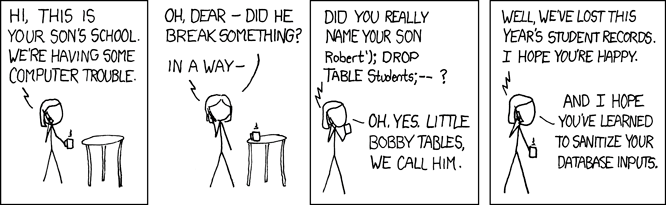

## ...so what does it mean to be "relational"?
Now we're going to dive into some of the most important parts of SQL: keys and relationships. Think about your UMich ID card. It gives you a unique identifying number that isn't your name (there could be many Jane Smiths). It is a permanent number and won't ever change, and nobody else will ever have the same ID number. Similarly, most databases need a **primary key**.

If we specified a name every time, it would be hard to find-and-replace. The database can guarantee that every row has an identifier for us, which improves searchability and ensures good performance for comparisons.

We will create multiple tables and `JOIN` them to understand how one type of data (e.g. actors) is connected to another (e.g. movies). This is how huge social networks associate photos to your account, associate tagged friends to photos, track friend/follow relationships, and more.

**Goal:** We would like to know which actors have been in the most Marvel movies, and how long they've been acting in Marvel films. To do this, we need a way to connect *actors with movies*.

## Example: *IMBD*, Index of Marvel data with Bradley Dice
First, we create a table `Movies` to store the movie titles and years. We will use a primary key `id`.

In [10]:
database = 'movie_ratings.sqlite'

# Removes the database if it already exists
if os.path.exists(database):
    os.remove(database)
    
with sqlite3.connect(database) as conn:
    # Here we create a primary key, and use "NOT NULL" to prevent inserting invalid data
    conn.execute(
        """CREATE TABLE Movies
        (id INTEGER PRIMARY KEY AUTOINCREMENT, title TEXT NOT NULL, year INTEGER NOT NULL)""")
    conn.executemany(
        """INSERT INTO Movies (title, year) VALUES (?,?)""",
        [('Iron Man', 2008),
         ('The Incredible Hulk', 2008),
         ('Iron Man 2', 2010),
         ('Thor', 2011),
         ('Captain America: The First Avenger', 2011),
         ('The Avengers', 2012),
         ('Iron Man 3', 2013),
         ('Captain America: The Winter Soldier', 2014),
         ('Avengers: Age of Ultron', 2015),
         ('Captain America: Civil War', 2016),
         ('Doctor Strange', 2016),
         ('Black Panther', 2018),
         ('Avengers: Infinity War', 2018),
        ])

Let's read back that data and make sure it worked as expected.

In [11]:
with sqlite3.connect(database) as conn:
    results = conn.execute("""SELECT * FROM Movies""")
    print(list(results))

[(1, 'Iron Man', 2008), (2, 'The Incredible Hulk', 2008), (3, 'Iron Man 2', 2010), (4, 'Thor', 2011), (5, 'Captain America: The First Avenger', 2011), (6, 'The Avengers', 2012), (7, 'Iron Man 3', 2013), (8, 'Captain America: The Winter Soldier', 2014), (9, 'Avengers: Age of Ultron', 2015), (10, 'Captain America: Civil War', 2016), (11, 'Doctor Strange', 2016), (12, 'Black Panther', 2018), (13, 'Avengers: Infinity War', 2018)]


Now we'll make a table for `Actors`.

In [12]:
with sqlite3.connect(database) as conn:
    conn.execute(
        """CREATE TABLE Actors
        (id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT NOT NULL,
        last_name TEXT NOT NULL,
        character TEXT NOT NULL,
        age real NOT NULL)""")
    conn.executemany(
        """INSERT INTO Actors (first_name, last_name, character, age) VALUES (?,?,?,?)""",
        [('Robert', 'Downey Jr.', 'Iron Man', 53),
         ('Chris', 'Evans', 'Captain America', 37),
         ('Scarlett', 'Johansson', 'Black Widow', 33),
         ('Samuel L.', 'Jackson', 'Nick Fury', 69),
         ('Benedict', 'Cumberbatch', 'Dr. Strange', 42),
         ('Brie', 'Larson', 'Captain Marvel', 29),
         ('Chadwick', 'Boseman', 'Black Panther', 40)
        ])
    # ...and print the results
    results = conn.execute("""SELECT * FROM Actors""")
    print(list(results))

[(1, 'Robert', 'Downey Jr.', 'Iron Man', 53.0), (2, 'Chris', 'Evans', 'Captain America', 37.0), (3, 'Scarlett', 'Johansson', 'Black Widow', 33.0), (4, 'Samuel L.', 'Jackson', 'Nick Fury', 69.0), (5, 'Benedict', 'Cumberbatch', 'Dr. Strange', 42.0), (6, 'Brie', 'Larson', 'Captain Marvel', 29.0), (7, 'Chadwick', 'Boseman', 'Black Panther', 40.0)]


We need a name for the table mapping between these. This is a **many-to-many** mapping. Actors can star in multiple movies, and movies can have multiple actors. Other mappings could be **one-to-one**, **one-to-many**, etc.

> There are only two hard things in Computer Science: cache invalidation and naming things. -- Phil Karlton

We shouldn't name this table with the reserved word [CAST](https://dev.mysql.com/doc/refman/8.0/en/cast-functions.html#function_cast). Another common naming scheme for these just concatenates the names: `MovieActors`, so we'll use that instead.

In [13]:
with sqlite3.connect(database) as conn:
    conn.execute(
        """CREATE TABLE MovieActors
        (id INTEGER PRIMARY KEY AUTOINCREMENT, movie_id INTEGER NOT NULL, actor_id INTEGER NOT NULL)""")
    conn.executemany(
        """INSERT INTO MovieActors (movie_id, actor_id) VALUES (?,?)""",
        [(1, 1), (2, 1), (3, 1), (6, 1), (7, 1), (9, 1), (10, 1), (13, 1), (5, 2), (6, 2), (8, 2), (9, 2), (10, 2), (13, 2),
        (3, 3), (6, 3), (8, 3), (9, 3), (10, 3), (13, 3), (1, 4), (3, 4), (4, 4), (5, 4), (6, 4), (8, 4), (9, 4), (13, 4),
        (11, 5), (13, 5), (10, 7), (12, 7), (13, 7)])
    # ...and print the results
    results = conn.execute("""SELECT * FROM MovieActors""")
    print(list(results))

[(1, 1, 1), (2, 2, 1), (3, 3, 1), (4, 6, 1), (5, 7, 1), (6, 9, 1), (7, 10, 1), (8, 13, 1), (9, 5, 2), (10, 6, 2), (11, 8, 2), (12, 9, 2), (13, 10, 2), (14, 13, 2), (15, 3, 3), (16, 6, 3), (17, 8, 3), (18, 9, 3), (19, 10, 3), (20, 13, 3), (21, 1, 4), (22, 3, 4), (23, 4, 4), (24, 5, 4), (25, 6, 4), (26, 8, 4), (27, 9, 4), (28, 13, 4), (29, 11, 5), (30, 13, 5), (31, 10, 7), (32, 12, 7), (33, 13, 7)]


## JOINing ~~forces~~ tables
This demonstrates a `JOIN` operation. There are different kinds of JOINs, explained nicely in [this resource](https://community.modeanalytics.com/sql/tutorial/sql-joins/).

In [14]:
with sqlite3.connect(database) as conn:
    results = conn.execute(
        """SELECT Movies.title, Actors.character FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id""")
    print(list(results))

[('Iron Man', 'Iron Man'), ('The Incredible Hulk', 'Iron Man'), ('Iron Man 2', 'Iron Man'), ('The Avengers', 'Iron Man'), ('Iron Man 3', 'Iron Man'), ('Avengers: Age of Ultron', 'Iron Man'), ('Captain America: Civil War', 'Iron Man'), ('Avengers: Infinity War', 'Iron Man'), ('Captain America: The First Avenger', 'Captain America'), ('The Avengers', 'Captain America'), ('Captain America: The Winter Soldier', 'Captain America'), ('Avengers: Age of Ultron', 'Captain America'), ('Captain America: Civil War', 'Captain America'), ('Avengers: Infinity War', 'Captain America'), ('Iron Man 2', 'Black Widow'), ('The Avengers', 'Black Widow'), ('Captain America: The Winter Soldier', 'Black Widow'), ('Avengers: Age of Ultron', 'Black Widow'), ('Captain America: Civil War', 'Black Widow'), ('Avengers: Infinity War', 'Black Widow'), ('Iron Man', 'Nick Fury'), ('Iron Man 2', 'Nick Fury'), ('Thor', 'Nick Fury'), ('Captain America: The First Avenger', 'Nick Fury'), ('The Avengers', 'Nick Fury'), ('Capt

### Using pandas 🐼 to help us:

In [15]:
import pandas as pd
with sqlite3.connect(database) as conn:
    df = pd.read_sql('SELECT * FROM Movies', conn)
    print(df)
    df.hist('year')

    id                                title  year
0    1                             Iron Man  2008
1    2                  The Incredible Hulk  2008
2    3                           Iron Man 2  2010
3    4                                 Thor  2011
4    5   Captain America: The First Avenger  2011
5    6                         The Avengers  2012
6    7                           Iron Man 3  2013
7    8  Captain America: The Winter Soldier  2014
8    9              Avengers: Age of Ultron  2015
9   10           Captain America: Civil War  2016
10  11                       Doctor Strange  2016
11  12                        Black Panther  2018
12  13               Avengers: Infinity War  2018


So how long have these actors been doing Marvel movies, anyway?

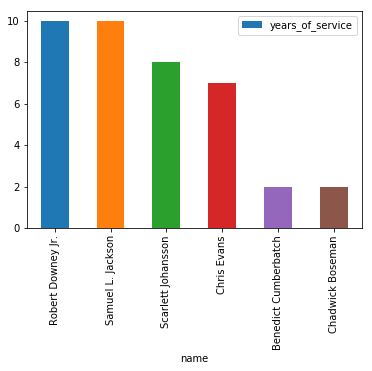

In [16]:
with sqlite3.connect(database) as conn:
    df = pd.read_sql("""SELECT MAX(Movies.year) - MIN(Movies.year) as years_of_service,
    Actors.first_name || " " || Actors.last_name as name FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id
        GROUP BY name
        ORDER BY years_of_service DESC""", conn)
    df.plot.bar(x='name', y='years_of_service')

And how old were they when they started?

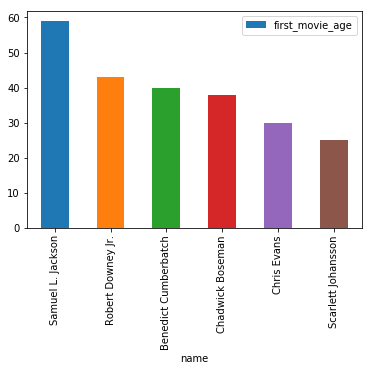

In [17]:
with sqlite3.connect(database) as conn:
    df = pd.read_sql("""SELECT Actors.age - (MAX(Movies.year) - MIN(Movies.year)) as first_movie_age,
    Actors.first_name || " " || Actors.last_name as name FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id
        GROUP BY name
        ORDER BY first_movie_age DESC""", conn)
    df.plot.bar(x='name', y='first_movie_age')

We can visualize this data in many ways, including this graph. (Note that Brie Larson appears, who was absent from our earlier plots because her movie, Captain Marvel, hasn't been released yet.)

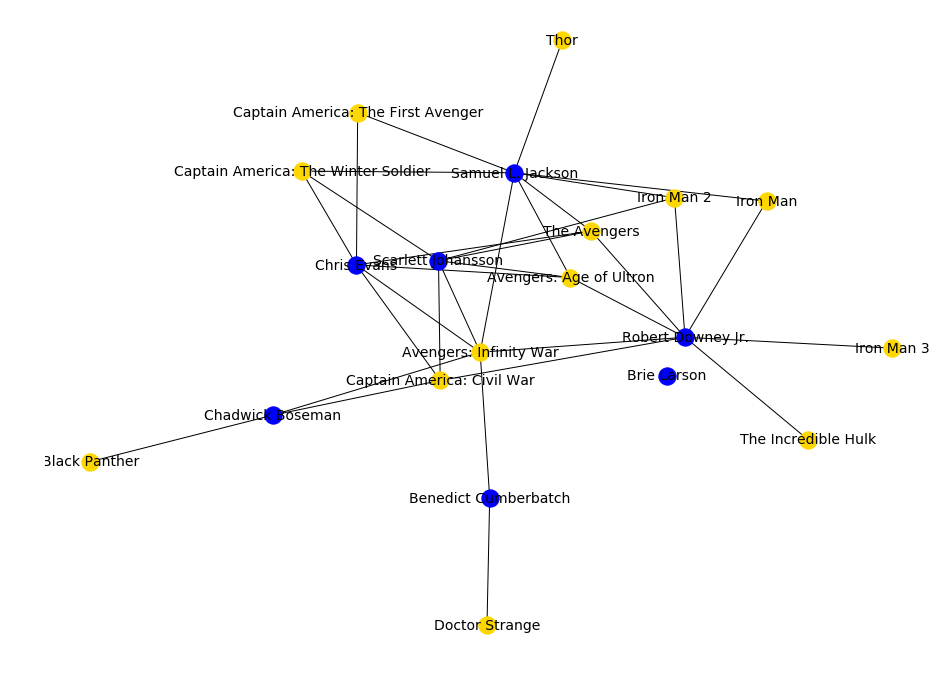

In [18]:
# Fancy demo, requires networkx
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Create a networkx Graph object
G = nx.Graph()

# Fetch data and fill the graph
with sqlite3.connect(database) as conn:
    movies = conn.execute("""SELECT title FROM Movies""")
    G.add_nodes_from([movie[0] for movie in movies], bipartite=0)
    actors = conn.execute("""SELECT first_name || " " || last_name FROM Actors""")
    G.add_nodes_from([actor[0] for actor in actors], bipartite=1)
    edges = conn.execute("""SELECT Movies.title, Actors.first_name || " " || Actors.last_name FROM MovieActors
        JOIN Movies ON MovieActors.movie_id = Movies.id
        JOIN Actors ON MovieActors.actor_id = Actors.id""")
    G.add_edges_from(edges)

# Plot the graph
plt.figure(figsize=(16, 12))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in G.nodes(data=True) if d['bipartite']==0], node_color='gold')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n, d in G.nodes(data=True) if d['bipartite']==1], node_color='blue')
nx.draw_networkx_labels(G, pos, font_size=14)
nx.draw_networkx_edges(G, pos)
plt.axis('off')
plt.show()

Observation: Avengers movies are near the center! What else could we learn from this data?

What if we wanted to add ratings? What kind of mapping is needed? What table columns would we use?

### Sources

Database reference material:
- https://www.alooma.com/blog/types-of-modern-databases
- https://en.wikipedia.org/wiki/Outline_of_databases
- https://www.jamesserra.com/archive/2015/08/relational-databases-vs-non-relational-databases/
- https://www.pluralsight.com/resource-center/guides/guide-to-becoming-a-database-admin
- https://www.sqlite.org/whentouse.html
- https://en.wikipedia.org/wiki/NoSQL
- https://docs.python.org/3.7/library/sqlite3.html
- https://www.w3schools.com/sql/sql_datatypes.asp
- https://community.modeanalytics.com/sql/tutorial/sql-joins/
- https://www.itprotoday.com/microsoft-sql-server/sql-design-how-choose-primary-key


Other Python packages used:
- https://networkx.github.io/documentation/stable/
- https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.read_sql.html

Raw data:
- https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_film_actors